In [39]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

import sys
from collections import defaultdict
import random

In [207]:
dataset = pd.read_excel('ItemList.xlsx',header=None)

In [208]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


In [209]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
dataset.values[1,1]

'pastry'

In [211]:
df_out = dataset.apply(lambda x: list(x.dropna().values), axis=1).tolist()

transactionEncoder = TransactionEncoder()
dataset = transactionEncoder.fit(df_out).transform(df_out)
dataset = dataset.astype('int')
print(dataset)

[[0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [212]:
dataset_df = pd.DataFrame(dataset,columns=transactionEncoder.columns_)
dataset_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
dataset_df.isnull().any()

Instant food products    False
UHT-milk                 False
abrasive cleaner         False
artif. sweetener         False
baby cosmetics           False
                         ...  
white bread              False
white wine               False
whole milk               False
yogurt                   False
zwieback                 False
Length: 167, dtype: bool

## Apriori

In [214]:
frequent_itemsets = apriori(dataset_df, min_support=0.001, use_colnames=True) # dat nguong dua tren so transaction 
print (frequent_itemsets)

      support                           itemsets
0    0.004010            (Instant food products)
1    0.021386                         (UHT-milk)
2    0.001470                 (abrasive cleaner)
3    0.001938                 (artif. sweetener)
4    0.008087                    (baking powder)
..        ...                                ...
745  0.001136  (rolls/buns, whole milk, sausage)
746  0.001002     (soda, rolls/buns, whole milk)
747  0.001337   (rolls/buns, whole milk, yogurt)
748  0.001069        (soda, whole milk, sausage)
749  0.001470      (whole milk, yogurt, sausage)

[750 rows x 2 columns]


In [215]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=1.4) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [57]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
1,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129
2,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
4,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531
5,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814
6,(detergent),(yogurt),0.008621,0.085879,0.001069,0.124031,1.444261,0.000329,1.043555
7,(yogurt),(detergent),0.085879,0.008621,0.001069,0.012451,1.444261,0.000329,1.003878
8,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969
9,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118


In [216]:
# "Có 'sausage không? nó kết hợp với item nào?"

for row in rules.iterrows():   
    if "sausage" in row[1][0]:
        print(row)

(1, antecedents             (sausage)
consequents           (beverages)
antecedent support       0.060349
consequent support       0.016574
support                  0.001537
confidence               0.025471
lift                     1.536764
leverage                 0.000537
conviction               1.009129
Name: 1, dtype: object)
(5, antecedents           (sausage)
consequents              (curd)
antecedent support     0.060349
consequent support     0.033683
support                0.002941
confidence             0.048726
lift                   1.446615
leverage               0.000908
conviction             1.015814
Name: 5, dtype: object)
(19, antecedents                    (sausage)
consequents           (soda, whole milk)
antecedent support              0.060349
consequent support              0.011629
support                         0.001069
confidence                      0.017719
lift                            1.523708
leverage                        0.000368
conviction       

## ECLAT

In [217]:
# # source code from: http://codegist.net/snippet/python/eclatpy_evertheylen_python
def tidlists(transactions):
    tl = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tl[item].add(tid)
    return list(tl.items())
 
class IntersectAll:
    def __and__(self, other):
        return other
IntersectAll = IntersectAll()

def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}
    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,)  # l is the (ordered) tuple of items we are looking for
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup:  # add frequent_itemsets to the new frequent_itemsets
                frequent_itemsets[l] = new_tidlist
             
            # define the new l-conditional database
            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))
             
            # recurse, with l as prefix
            recurse(new_items, l)
     
    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}

In [218]:
dataset2 = pd.read_excel('ItemList.xlsx',header=None)

In [221]:
record = []
for i in range(0, dataset2.shape[0]):
    row = []
    for j in range(0, dataset2.shape[1]):
        if str(dataset2.values[i,j]) != 'nan':
               row.append(str(dataset2.values[i,j]))               
    record.append(row)
record[0]

['sausage', 'whole milk', 'semi-finished bread', 'yogurt']

In [222]:
tl = tidlists(records)
tl

[('sausage',
  {0,
   3,
   6,
   14,
   58,
   85,
   93,
   98,
   124,
   131,
   141,
   215,
   220,
   272,
   275,
   311,
   315,
   322,
   327,
   329,
   330,
   344,
   412,
   455,
   483,
   488,
   547,
   570,
   571,
   597,
   664,
   672,
   673,
   718,
   725,
   748,
   750,
   759,
   788,
   800,
   809,
   831,
   851,
   872,
   876,
   884,
   888,
   922,
   926,
   938,
   942,
   954,
   988,
   995,
   997,
   1006,
   1007,
   1057,
   1058,
   1076,
   1084,
   1095,
   1109,
   1118,
   1127,
   1149,
   1180,
   1190,
   1191,
   1195,
   1202,
   1209,
   1212,
   1229,
   1313,
   1330,
   1333,
   1353,
   1363,
   1424,
   1438,
   1441,
   1444,
   1447,
   1455,
   1462,
   1468,
   1469,
   1481,
   1483,
   1502,
   1503,
   1505,
   1591,
   1601,
   1679,
   1682,
   1683,
   1687,
   1690,
   1699,
   1739,
   1740,
   1746,
   1747,
   1762,
   1764,
   1774,
   1789,
   1816,
   1823,
   1837,
   1845,
   1850,
   1865,
   1876,
   1888,


In [223]:
result = eclat(tl, minsup=60, minlen=3)

In [224]:
print(result)

{('pork', 'nan', 'whole milk'): 75, ('fruit/vegetable juice', 'nan', 'whole milk'): 66, ('brown bread', 'nan', 'whole milk'): 67, ('citrus fruit', 'other vegetables', 'nan'): 72, ('citrus fruit', 'rolls/buns', 'nan'): 70, ('citrus fruit', 'nan', 'yogurt'): 69, ('citrus fruit', 'nan', 'whole milk'): 107, ('newspapers', 'nan', 'whole milk'): 84, ('domestic eggs', 'nan', 'whole milk'): 79, ('bottled beer', 'other vegetables', 'nan'): 70, ('bottled beer', 'rolls/buns', 'nan'): 60, ('bottled beer', 'nan', 'whole milk'): 107, ('bottled water', 'other vegetables', 'nan'): 82, ('bottled water', 'rolls/buns', 'nan'): 70, ('bottled water', 'soda', 'nan'): 72, ('bottled water', 'nan', 'whole milk'): 107, ('margarine', 'nan', 'whole milk'): 61, ('shopping bags', 'other vegetables', 'nan'): 74, ('shopping bags', 'rolls/buns', 'nan'): 71, ('shopping bags', 'soda', 'nan'): 66, ('shopping bags', 'nan', 'whole milk'): 95, ('pip fruit', 'other vegetables', 'nan'): 73, ('pip fruit', 'rolls/buns', 'nan'):

In [225]:
import numpy as np
keys = result.values()
titles = result.keys()
list_titles = []
for item in titles:
    list_titles.append(','.join(item))  

In [226]:
keys

dict_values([75, 66, 67, 72, 70, 69, 107, 84, 79, 70, 60, 107, 82, 70, 72, 107, 61, 74, 71, 66, 95, 73, 73, 99, 79, 86, 79, 64, 113, 94, 91, 81, 78, 123, 70, 62, 157, 77, 145, 60, 120, 222, 89, 69, 70, 121, 63, 116, 209, 79, 62, 79, 61, 87, 174, 89, 90, 97, 167, 85, 134])

In [227]:
titles

dict_keys([('pork', 'nan', 'whole milk'), ('fruit/vegetable juice', 'nan', 'whole milk'), ('brown bread', 'nan', 'whole milk'), ('citrus fruit', 'other vegetables', 'nan'), ('citrus fruit', 'rolls/buns', 'nan'), ('citrus fruit', 'nan', 'yogurt'), ('citrus fruit', 'nan', 'whole milk'), ('newspapers', 'nan', 'whole milk'), ('domestic eggs', 'nan', 'whole milk'), ('bottled beer', 'other vegetables', 'nan'), ('bottled beer', 'rolls/buns', 'nan'), ('bottled beer', 'nan', 'whole milk'), ('bottled water', 'other vegetables', 'nan'), ('bottled water', 'rolls/buns', 'nan'), ('bottled water', 'soda', 'nan'), ('bottled water', 'nan', 'whole milk'), ('margarine', 'nan', 'whole milk'), ('shopping bags', 'other vegetables', 'nan'), ('shopping bags', 'rolls/buns', 'nan'), ('shopping bags', 'soda', 'nan'), ('shopping bags', 'nan', 'whole milk'), ('pip fruit', 'other vegetables', 'nan'), ('pip fruit', 'rolls/buns', 'nan'), ('pip fruit', 'nan', 'whole milk'), ('root vegetables', 'other vegetables', 'nan

In [228]:
sorted_d = sorted((value, key) for (key,value) in result.items())

df2 = pd.DataFrame(sorted_d)
df2.columns = ['keys','items']
df2.head()

,keys,items
0,60,"(bottled beer, rolls/buns, nan)"
1,60,"(other vegetables, canned beer, nan)"
2,61,"(margarine, nan, whole milk)"
3,61,"(soda, pastry, nan)"
4,62,"(curd, nan, whole milk)"


In [231]:
# "Có Sausage không? nó kết hợp với item nào?"
for k, v in result.items():   
    if "sausage" in k:
        print(k, ":", v)

('other vegetables', 'nan', 'sausage') : 89
('rolls/buns', 'nan', 'sausage') : 79
('soda', 'nan', 'sausage') : 89
('nan', 'yogurt', 'sausage') : 85
('nan', 'whole milk', 'sausage') : 134


In [233]:
# Cho biết 15 sản phẩm được ít nhiều nhất. Vẽ biểu đồ.
df2[:15]

,keys,items
0,60,"(bottled beer, rolls/buns, nan)"
1,60,"(other vegetables, canned beer, nan)"
2,61,"(margarine, nan, whole milk)"
3,61,"(soda, pastry, nan)"
4,62,"(curd, nan, whole milk)"
5,62,"(other vegetables, whipped/sour cream, nan)"
6,63,"(rolls/buns, canned beer, nan)"
7,64,"(root vegetables, nan, yogurt)"
8,66,"(fruit/vegetable juice, nan, whole milk)"
9,66,"(shopping bags, soda, nan)"


In [234]:
# Cho biết 15 sản phẩm được mua nhiều nhất.
df2[len(df2)-15:]

,keys,items
46,107,"(bottled beer, nan, whole milk)"
47,107,"(bottled water, nan, whole milk)"
48,107,"(citrus fruit, nan, whole milk)"
49,113,"(root vegetables, nan, whole milk)"
50,116,"(rolls/buns, nan, yogurt)"
51,120,"(other vegetables, nan, yogurt)"
52,121,"(rolls/buns, soda, nan)"
53,123,"(tropical fruit, nan, whole milk)"
54,134,"(nan, whole milk, sausage)"
55,145,"(other vegetables, soda, nan)"


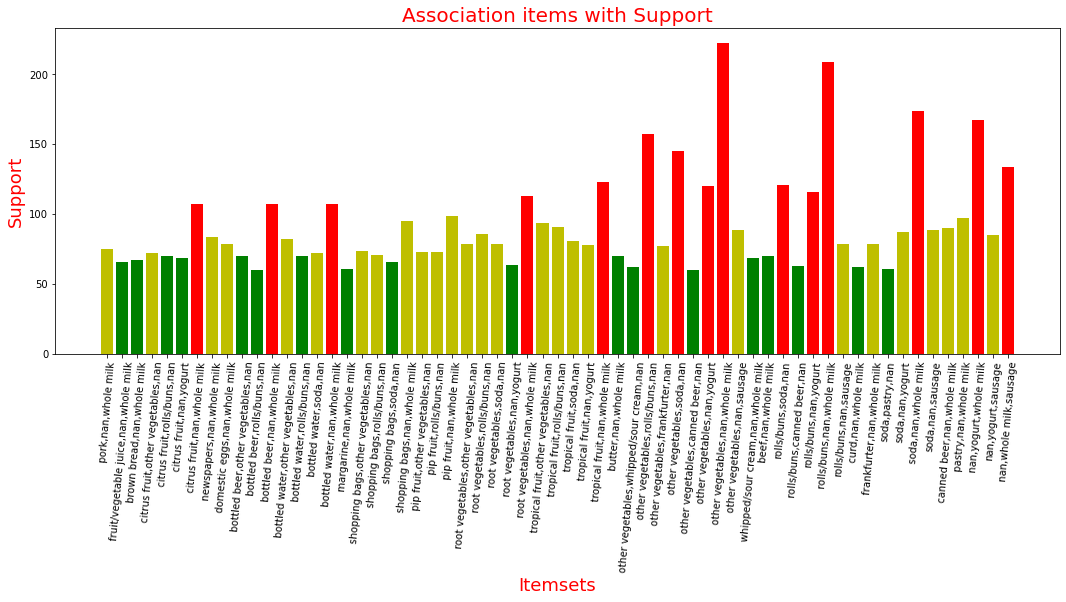

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))

y = np.array(list(keys))
c = np.empty((y.shape[0],), dtype=str)
c[y<=70] ='green'
c[(y>70) & (y<=100)] = 'yellow'
c[y>100] ='red'

plt.bar(list_titles,keys, color=c.tolist())
plt.title("Association items with Support", color="red", fontsize=20)
plt.ylabel("Support", color="red", fontsize=18)
plt.xticks(rotation=85)
plt.xlabel("Itemsets", color='red', fontsize=18)
plt.show()

1. Áp dụng thuật toán (tự lựa chọn các tham số phù hợp cho thuật toán, lưu ý với số
lượng transaction càng nhiều thì các ngưỡng nên đặt càng nhỏ). In kết quả. Vẽ biểu
đồ.
2. Tìm kiếm thông tin từ kết quả: trong thông tin kết quả có 'sausage' không? Nếu có
thì 'sausage' kết hợp với item nào?
3. Cho biết 15 sản phẩm được mua nhiều nhất. Vẽ biểu đồ.
4. Cho biết 15 sản phẩm được mua ít nhất. Vẽ biểu đồ.

In [255]:
df2

,keys,items
0,60,"(bottled beer, rolls/buns, nan)"
1,60,"(other vegetables, canned beer, nan)"
2,61,"(margarine, nan, whole milk)"
3,61,"(soda, pastry, nan)"
4,62,"(curd, nan, whole milk)"
...,...,...
56,157,"(other vegetables, rolls/buns, nan)"
57,167,"(nan, yogurt, whole milk)"
58,174,"(soda, nan, whole milk)"
59,209,"(rolls/buns, nan, whole milk)"


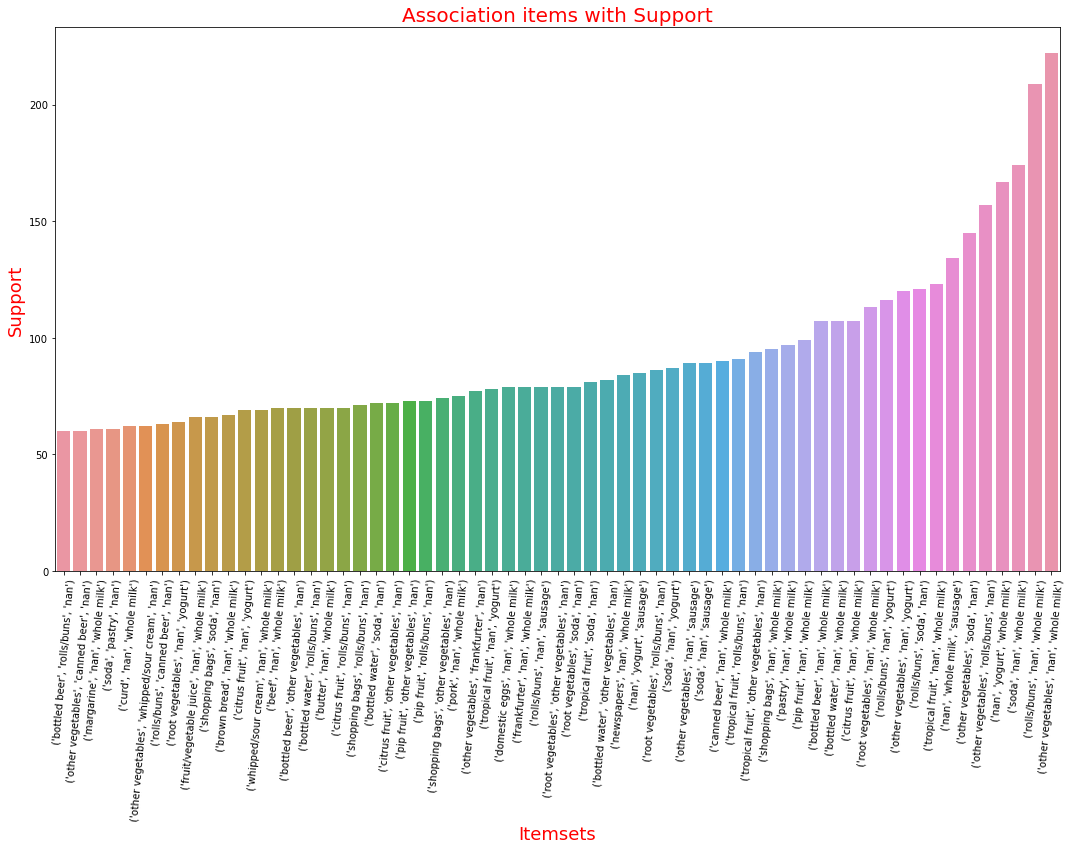

In [254]:
import seaborn as sns
plt.figure(figsize=(18,10))
ax = sns.barplot(x='items', y='keys', data = df2, palette=custom_palette)
plt.title("Association items with Support", color="red", fontsize=20)
plt.ylabel("Support", color="red", fontsize=18)
plt.xticks(rotation=85)
plt.xlabel("Itemsets", color='red', fontsize=18)
plt.show()